<a href="https://colab.research.google.com/github/Syeda-Eman/Machine_Learning/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing dependencies**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
import kagglehub
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

100%|██████████| 292k/292k [00:00<00:00, 63.6MB/s]

Extracting files...


In [3]:
import pandas as pd
import os

# Construct the full path to the CSV file
csv_file_path = os.path.join(path, 'car data.csv')

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first 5 rows of the DataFrame
display(df.head())

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#checking no of rows and columns
df.shape

(301, 9)

In [5]:
#printing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#checking num of missing values
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [7]:
#checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# **Encoding categorical data**

In [8]:
#encoding "Fuel_Type"
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

#encoding "Seller_Type"
df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

#encoding "Transmission"
df.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

/tmp/ipython-input-4086367606.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
/tmp/ipython-input-4086367606.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
/tmp/ipython-input-4086367606.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# **Splitting data**

In [10]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [11]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [12]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# **Model training (Linear regression)**

In [15]:
lin_reg_model = LinearRegression()

In [17]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

# **Modle Evaluation (training data)**

In [18]:
training_data_pred = lin_reg_model.predict(X_train)

In [19]:
#R squared error
metrics.r2_score(Y_train, training_data_pred)

0.8799451660493711

# **Visualization**

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

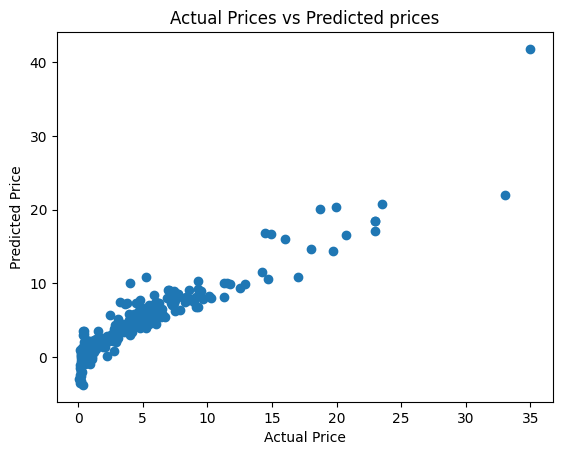

In [20]:
plt.scatter(Y_train, training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted prices")

# **Modle Evaluation (testing data)**

In [21]:
testing_data_pred = lin_reg_model.predict(X_test)

In [22]:
#R squared error
metrics.r2_score(Y_test, testing_data_pred)

0.8365766715027051

# **Visualization**

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

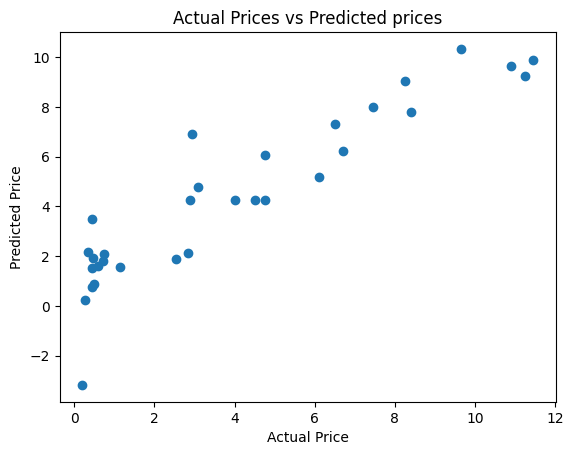

In [23]:
plt.scatter(Y_test, testing_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted prices")

# **Model training (Lasso)**

In [24]:
lasso_model = Lasso()

In [25]:
lasso_model.fit(X_train, Y_train)

Lasso()

# **Modle Evaluation (training data)**

In [26]:
training_data_pred = lasso_model.predict(X_train)

In [27]:
#R squared error
metrics.r2_score(Y_train, training_data_pred)

0.8427856123435794

# **Visualization**

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

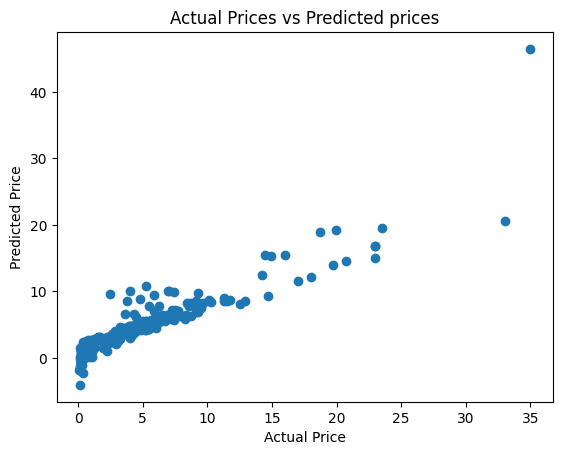

In [28]:
plt.scatter(Y_train, training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted prices")

# **Modle Evaluation (testing data)**

In [29]:
testing_data_pred = lin_reg_model.predict(X_test)

In [30]:
#R squared error
metrics.r2_score(Y_test, testing_data_pred)

0.8365766715027051

# **Visualization**

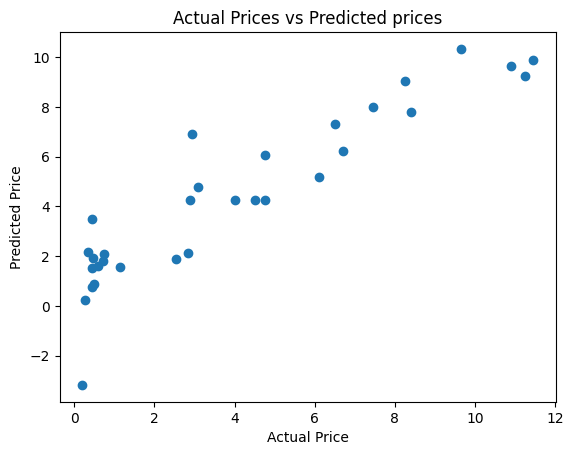

In [32]:
plt.scatter(Y_test, testing_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted prices")
plt.show()